For Griff's environment, set these variables (NB_DIR for convenience) 

```
set NB_DIR=C:\cygwin\home\Griff\datathon2017\melbourne-datathon\notebooks
set DATA_DIR=C:\cygwin\home\Griff\datathon2017\MelbDatathon2017
```

I am running on Windows, so I have based this on the basic.sh in the repository.

```
conda create -n dthon python=3 python
conda config --add channels conda-forge

activate dthon
conda install -y pandas
conda install -y jupyter
conda install -y matplotlib

cd %NB_DIR%

jupyter notebook
```

As far as I can tell, this should work...

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as pl

In [2]:
data_dir = os.getenv('DATA_DIR')
print (data_dir)

C:\cygwin\home\Griff\datathon2017\MelbDatathon2017


In [3]:
# Path to the data.  Forgive me for renaming everything!

fd_pat = os.path.join(data_dir, "Lookups", "patients.txt")
print(fd_pat)

C:\cygwin\home\Griff\datathon2017\MelbDatathon2017\Lookups\patients.txt


In [4]:
# Main dataframe, takes a bit of time to load.
p_frame = pd.read_csv(fd_pat, sep = '\t', na_filter = False)

# Note: cannot use na_values = 1900 because it loses the Patient_ID = 1990
# p_frame = pd.read_csv(fd_pat, sep = '\t', na_values = 1900)

In [5]:
p_frame.count()

Patient_ID       558352
gender           558352
year_of_birth    558352
postcode         558352
dtype: int64

In [6]:
p_frame.head()

,Patient_ID,gender,year_of_birth,postcode
0,1,F,1900,2516
1,2,F,1935,3042
2,3,M,1900,4750
3,4,U,1900,2765
4,5,U,1900,2229


In [7]:
# Looking for the number of unique element in each columns.

for col in p_frame.columns:
    print(col, len(p_frame[col].unique()))

Patient_ID 558352
gender 3
year_of_birth 95
postcode 2529


In [8]:
# variation to order the lists... couldn't work out how to do it on one line...
# Looking at the smaller sets to see what they might contain.
for col in ('gender', 'year_of_birth'):
    u = p_frame[col].unique()
    u.sort()
    print(col, len(u), u)

gender 3 ['F' 'M' 'U']
year_of_birth 95 [1900 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950
 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980
 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015]


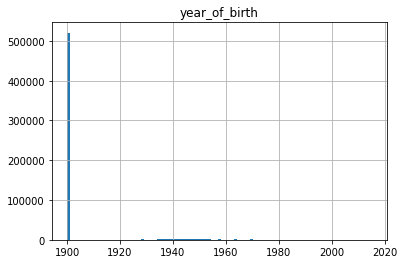

In [9]:
p_frame.hist('year_of_birth', bins=95)
pl.show()